<h1>Predicting accident severity: Analysis of Seattle collisions data using supervised machine learning (SML)</h1>

**By Sean Moffat**<br>
Data Scientist and Economist

September 19, 2020

### The objective of this Python project is to support my capstone project for IBM's Data Science Professional Certificate offered by Coursera.
* I'll be using  Jupyter Notebook to complete this Applied Data Science Capstone project
* Here is a [link](https://www.ibm.com/blogs/ibm-training/data-science-ibm-coursera/) to IBM's press release for this course

<h2>Table of contents</h2>

1. Introduction
2. Data
    * 2.1. Data collection and preparation
    * 2.2. Data understanding 
3. Methodology
    * 3.1. Modeling 
    * 3.2. Evaluation 
4. Results
5. Discussion
6. Conclusions

<h2>1. Introduction</h2>
  
Traffic accidents across the United States are a major issue, especially so in large cities, such as Seattle. Traffic accidents cause immediate direct damage to those involved and indirect and possibly long-lasting for those not directly involved. Of course, damages can range from minor scratches to most severe, loss of life. 

Being able to accurately predict accident severity could be a useful tool for city managers and the rest of the population as well. With a shared understanding of traffic accident facts, the general public and city managers can develop data-driven policies to help mitigate accidents which should lead to fewer accidents with injuries. 

This analysis will use **supervised machine learning (SML) classification models** to predict the severity of accidents, where severity is defined as an accident resulting in an injury. Additionally, I will use standard logistic regression to provide additional information / perspective on the relationship between accident severity (the dependent variable) and our feature set (the independent variables).

<h2>2. Data</h2>

For this case study, I am using the “Data-Collisions.csv” data set from the course website. This set contains traffic collision data from Seattle, WA covering accidents from January 1, 2014 – April 29, 2020. This set contains 38 features and after data cleaning and data preparation, I have 10 features left for modeling. Tables 1 and 2 below present information on the label and feature sets, respectively, that were used in the analysis. 

The data discussion is continued in 2.1) Data collection and preparation and 2.2) Data understanding. 


__Table 1.__ Label set

| Original values of SEVERITYCODE  | Feature engineered to be<br>*__binary__* number |
| :---                             | :---:                                           |
| 'Property Damage Only Collision' | 0                                               |
| 'Injury Collision'               | 1                                               | 


__Table 2.__ Feature set

| Ref.   | Feature              | Description                               | Type | 
| :---:  | :---                 | :---                                      | :--- |
| 01     | COLLISIONTYPE_TO_NUM | Collision type.  | Numeric unit interval (10 values)  |
| 02     | PERSONCOUNT          | The total number of people involved in the collision.  | Continous  |
| 03     | PEDCOUNT             | The number of pedestrians involved in the collision.  | Continous  |
| 04     | PEDCYLCOUNT          | The number of bicycles involved in the collision.  | Continous  |
| 05     | VEHCOUNT             | The number of vehicles involved in the collision.  | Continous  |
| 06     | HITPARKEDCAR_TO_NUM  | Whether or not the collision involved hitting a parked car.  | Binary. 1 = yes, 0 = no  |
| 07     | UNDERINFL_TO_NUM     | Whether or not a driver involved was under the influence of drugs or alcohol.  | Binary. 1 = yes, 0 = no  |
| 08     | WEATHER_TO_NUM       | A description of the weather conditions during the time of the collision.  | Numeric unit interval (11 values)  |
| 09     | ROADCOND_TO_NUM      | The condition of the road during the collision.  | Numeric unit interval (9 values)  |
| 10     | LIGHTCOND_TO_NUM     | The light conditions during the collision.  | Numeric unit interval (9 values)  |


<h3>2.1. Data collection and preparation</h3>

I use <code>pandas.read_csv()</code> function to read the source csv file which I downloaded from the course website. With the data in a pandas dataframe I start my exploratory data analysis by checking data elements for: 
1. __Missing data__: My decision rule is to drop whole data columns if more than 40% of observations are missing and additionally, drop whole rows if data is missing from key features; 
2. __Convert date/time elements__: To take advantage of useful Python and pandas functions, it is important to store dates as date formats. From this, I was able to create other date features, such as year-month combination (useful later to summarize data); and 
3. __Data transformation / feature engineering__: At this step, I create new features from existing features. For text and alphanumeric features, I create new features that are numeric version of existing features; numeric features will be used in the modeling process. 

In the final step of data collection and preparation phase, I create two new dataframes, __train / validate__ set and a __out-of-sample (OOS) test__ set. I created these two dataframes from the existing dataframe by slicing data using incident date element. The train / validate dataframe will be *used to train and test the SML models*; this set contains records with incident dates between Jan. 1, 2004 and Dec. 31, 2019 and has 188,061 records. The OOS test dataframe will be *used to evaluate model performance* by using data the model has not seen; this set was populated from records with records with incident date greater than or equal to Jan. 1, 2020, there are 1,255 records in this set. 

In [1]:
# Step 1: Basic program set up, including importing a couple of useful libraries
import os
#print ("Current Directory : ", os.path.abspath('.'))
#print

# Printing what Python Version is installed
import sys
import platform
print ("Python Details: ", sys.version)
#print (sys.version)
print ("Your Python Version is: ", platform.python_version())
print
#####
#####
#####
# Data analysis modules
try:
    import pandas as pd 
    print ("pandas is installed; we're using version: ", pd.__version__)
except ImportError:
    sys.exit("Error : pandas can not be imported or not installed.")
print

try:
    import numpy as np 
    print ("NumPy is installed; we're using version: ", np.__version__)
except ImportError:
    sys.exit("Error : NumPy can not be imported or not installed.")
print


try:
    import scipy
    print ("Scipy is installed and the version used is : ", scipy.__version__)
except ImportError:
    sys.exit("Error : Scipy can not be imported or not installed.")
print

from scipy import stats # For simple statistical tests, we will use the scipy.stats sub-module of scipy:
import scipy.optimize as opt
#####
#####
#####
# Data visualization modules
import matplotlib as mpl
try:
    import matplotlib.pyplot as plt
    print ("Matplotlib is installed and version is : ", mpl.__version__)
except ImportError:
    sys.exit("Error : Matplotlib can not be imported or not installed.")
print

import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# display your plots inside your notebook
# we are using the inline backend
%matplotlib inline
#%matplotlib notebook



try:
    import seaborn as sns
    print ("Seaborn is installed and the version used is : ", sns.__version__)
except ImportError:
    sys.exit("Error : Seaborn can not be imported or not installed.")
print
#####
#####
#####
# Importing other useful utilities
try:
    import datetime as date
    print ("datetime is installed and can be imported")
except ImportError:
    sys.exit("Error : datetime can not be imported or not installed.")
print


import urllib.request

from networkx.drawing.nx_pydot import to_pydot
from IPython.display import Image, display
print(' ')

import itertools
import pylab as pl

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("All done running module setup . . . ")

Python Details:  3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Your Python Version is:  3.7.3
pandas is installed; we're using version:  0.25.1
NumPy is installed; we're using version:  1.16.4
Scipy is installed and the version used is :  1.3.0
Matplotlib is installed and version is :  3.1.0
Seaborn is installed and the version used is :  0.10.1
datetime is installed and can be imported
 
All done running module setup . . . 


In [2]:
df = pd.read_csv("/Users/smoffat/Documents/input/Data-Collisions.csv", delimiter=',', nrows = None)

# Showing the first 5 rows of 'df'
df.head()

/Users/smoffat/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
print('Size of the input data set: Data-Collisions.csv')
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))

Size of the input data set: Data-Collisions.csv
Number of features: 38
Number of examples: 194673


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
PEDROWNOTGRNT,190006,0.976026
EXCEPTRSNDESC,189035,0.971039
SPEEDING,185340,0.952058
INATTENTIONIND,164868,0.846897
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
Y,5334,0.027400
X,5334,0.027400


In [6]:
df.drop(['PEDROWNOTGRNT',
         'EXCEPTRSNDESC', 
         'SPEEDING', 
         'INATTENTIONIND', 
         'INTKEY', 
         'EXCEPTRSNCODE', 
         'SDOTCOLNUM' 
        ], axis=1, inplace=True)

print("What's the shape of our dataframe after dropping records where at least 40% of the attributes have missing values")
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))


What's the shape of our dataframe after dropping records where at least 40% of the attributes have missing values
Number of features: 31
Number of examples: 194673


In [7]:
# simply drop whole row with NaN in columns
df.dropna(subset=["LIGHTCOND", 
                  "WEATHER", 
                  "ROADCOND", 
                  "COLLISIONTYPE" 
                 ], axis=0, inplace=True)

# reset index, because we droped a number of rows
df.reset_index(drop=True, inplace=True)

print("We just deleted rows contaning missing labels. What's the shape of our dataframe now?")
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))


We just deleted rows contaning missing labels. What's the shape of our dataframe now?
Number of features: 31
Number of examples: 189316


In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
JUNCTIONTYPE,6139,0.032427
Y,5170,0.027309
X,5170,0.027309
LOCATION,2554,0.013491
ADDRTYPE,1812,0.009571
WEATHER,0,0.000000
INCDTTM,0,0.000000
SDOT_COLCODE,0,0.000000
SDOT_COLDESC,0,0.000000
UNDERINFL,0,0.000000


In [9]:
# Data wrangling . . . , re: convert to 'date' attributes from source file date time object
df['INCDTTM_V02'] = pd.to_datetime(df['INCDTTM'])

# Using date time attribures created above, create new date only attributes 
#df['CRASH_DATE-DATE_ONLY'] = df['CRASH_DATE_V02'].dt.date

# Create a Year Month data element . . . will produce YYYY-MM
df['CRASH_DATE_YEAR_MONTH'] = df['INCDTTM_V02'].dt.strftime('%Y-%m')
# Create a Year data element . . . will produce YYYY-MM
df['CRASH_DATE_YEAR'] = df['INCDTTM_V02'].dt.strftime('%Y')
#df['YEAR_OF_CRASH'] = df['CRASH_DATE_V02'].map(lambda x: x.strftime('%Y')) # ALTERNATE METHOD 
# Create a Month data element . . . will produce MM
df['CRASH_DATE_MONTH'] = df['INCDTTM_V02'].dt.strftime('%m')
# Create a Day data element . . . will produce DD
df['CRASH_DATE_DAY'] = df['INCDTTM_V02'].dt.strftime('%d')


grouped_df = df.groupby('CRASH_DATE_YEAR').size()
print('Distribution of CRASH_DATE_YEAR across all records in the original data set')
print(grouped_df)
print('')
print("----- OUTPUT BREAK -----")
print('')
print('Oldest date in Data-Collisions.csv data set')
print(df.INCDTTM_V02.min())
print('')
print('Most recent date in Data-Collisions.csv data set')
print(df.INCDTTM_V02.max())
print('')
print("----- OUTPUT BREAK -----")
print('')
df_nunique = df.agg({"REPORTNO": "nunique"})
print(' ')
print("Number of unique REPORTNO on Data-Collisions.csv:", df_nunique)
print("----- OUTPUT BREAK -----")
print('')
print('Size of the input data set: Data-Collisions.csv')
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))

Distribution of CRASH_DATE_YEAR across all records in the original data set
CRASH_DATE_YEAR
2004    11865
2005    15115
2006    15181
2007    14450
2008    13654
2009    11734
2010    10804
2011    10919
2012    10244
2013     9976
2014    11534
2015    12719
2016    10870
2017    10439
2018     9852
2019     8705
2020     1255
dtype: int64

----- OUTPUT BREAK -----

Oldest date in Data-Collisions.csv data set
2004-01-01 00:00:00

Most recent date in Data-Collisions.csv data set
2020-04-29 10:20:00

----- OUTPUT BREAK -----

 
Number of unique REPORTNO on Data-Collisions.csv: REPORTNO    189313
dtype: int64
----- OUTPUT BREAK -----

Size of the input data set: Data-Collisions.csv
Number of features: 36
Number of examples: 189316


In [10]:
# Reorder features and keep features of interest 
x_df = df[['REPORTNO', 
           'INCDTTM', 
           'INCDATE', 
           'INCDTTM_V02', 
           'CRASH_DATE_YEAR', 
           'CRASH_DATE_YEAR_MONTH', 
           'CRASH_DATE_MONTH', 
           'CRASH_DATE_DAY', 
           # Label / target 
           'SEVERITYCODE', 
           'SEVERITYDESC', 
           # Features about the traffic accident 
           'COLLISIONTYPE', # Requires feature engineering 
           'PERSONCOUNT', 
           'PEDCOUNT',  
           'PEDCYLCOUNT', 
           'VEHCOUNT', 
           'HITPARKEDCAR', 
           # Features about the driver 
           'UNDERINFL',  
           # Features about outside conditions 
           'WEATHER',  
           'ROADCOND',  
           'LIGHTCOND'
          ]].copy()

print("What's the shape of the in-process analysis data set?")
print('Number of features: {}'.format(x_df.shape[1]))
print('Number of examples: {}'.format(x_df.shape[0]))
#####
#####
#####

x_df.head()

What's the shape of the in-process analysis data set?
Number of features: 20
Number of examples: 189316


,REPORTNO,INCDTTM,INCDATE,INCDTTM_V02,CRASH_DATE_YEAR,CRASH_DATE_YEAR_MONTH,CRASH_DATE_MONTH,CRASH_DATE_DAY,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,3502005,3/27/2013 2:54:00 PM,2013/03/27 00:00:00+00,2013-03-27 14:54:00,2013,2013-03,03,27,2,Injury Collision,Angles,2,0,0,2,N,N,Overcast,Wet,Daylight
1,2607959,12/20/2006 6:55:00 PM,2006/12/20 00:00:00+00,2006-12-20 18:55:00,2006,2006-12,12,20,1,Property Damage Only Collision,Sideswipe,2,0,0,2,N,0,Raining,Wet,Dark - Street Lights On
2,1482393,11/18/2004 10:20:00 AM,2004/11/18 00:00:00+00,2004-11-18 10:20:00,2004,2004-11,11,18,1,Property Damage Only Collision,Parked Car,4,0,0,3,N,0,Overcast,Dry,Daylight
3,3503937,3/29/2013 9:26:00 AM,2013/03/29 00:00:00+00,2013-03-29 09:26:00,2013,2013-03,03,29,1,Property Damage Only Collision,Other,3,0,0,3,N,N,Clear,Dry,Daylight
4,1807429,1/28/2004 8:04:00 AM,2004/01/28 00:00:00+00,2004-01-28 08:04:00,2004,2004-01,01,28,2,Injury Collision,Angles,2,0,0,2,N,0,Raining,Wet,Daylight


'INCDATE' feature can be dropped in next dataframe

The six features below are either text or alphanumeric. I will creaate new features where each cell is a number
* COLLISIONTYPE
* HITPARKEDCAR
* UNDERINFL
* WEATHER
* ROADCOND
* LIGHTCOND

In [11]:
# Get a distribution of categorical variables  
# with dropna set to False we can also see NaN index values.

print('SEVERITYCODE: value_counts')
print(df.SEVERITYCODE.value_counts(dropna=False))
print('')
print("----- OUTPUT BREAK -----")
print('')

print('SEVERITYDESC: value_counts')
print(df.SEVERITYDESC.value_counts(dropna=False))
print('')
print("----- OUTPUT BREAK -----")
print('')

print('COLLISIONTYPE: value_counts')
print(df.COLLISIONTYPE.value_counts(dropna=False))
print('')
print("----- OUTPUT BREAK -----")
print('')
print('HITPARKEDCAR: value_counts')
print(df.HITPARKEDCAR.value_counts(dropna=False))
print('')
print("----- OUTPUT BREAK -----")
print('')
print('UNDERINFL: value_counts')
print(df.UNDERINFL.value_counts(dropna=False))
print('')
print("----- OUTPUT BREAK -----")
print('')
print('WEATHER: value_counts')
print(df.WEATHER.value_counts(dropna=False))
print('')
print("----- OUTPUT BREAK -----")
print('')
print('ROADCOND: value_counts')
print(df.ROADCOND.value_counts(dropna=False))
print('')
print("----- OUTPUT BREAK -----")
print('')
print('LIGHTCOND: value_counts')
print(df.LIGHTCOND.value_counts(dropna=False))
#print('')
#print("----- OUTPUT BREAK -----")
#print('')
#print('SDOT_COLDESC: value_counts')
#print(df.SDOT_COLDESC.value_counts(dropna=False))


SEVERITYCODE: value_counts
1    132277
2     57039
Name: SEVERITYCODE, dtype: int64

----- OUTPUT BREAK -----

SEVERITYDESC: value_counts
Property Damage Only Collision    132277
Injury Collision                   57039
Name: SEVERITYDESC, dtype: int64

----- OUTPUT BREAK -----

COLLISIONTYPE: value_counts
Parked Car    47815
Angles        34621
Rear Ended    34037
Other         23613
Sideswipe     18578
Left Turn     13687
Pedestrian     6593
Cycles         5403
Right Turn     2952
Head On        2017
Name: COLLISIONTYPE, dtype: int64

----- OUTPUT BREAK -----

HITPARKEDCAR: value_counts
N    182478
Y      6838
Name: HITPARKEDCAR, dtype: int64

----- OUTPUT BREAK -----

UNDERINFL: value_counts
N    99843
0    80376
Y     5102
1     3995
Name: UNDERINFL, dtype: int64

----- OUTPUT BREAK -----

WEATHER: value_counts
Clear                       111002
Raining                      33110
Overcast                     27675
Unknown                      15037
Snowing                        90

In [12]:
# Create a function that converts all values of df['xxx'] into numbers
def SEVERITYCODE_TO_NUMERIC(x):
    if x==2: # Injury Collision
        return 1
    if x==1: # Property Damage Only Collision
        return 0
#####
#####
#####
def COLLISIONTYPE_TO_NUMERIC(x):
    if x=='Parked Car':
        return 1
    if x=='Rear Ended':
        return 2
    if x=='Other':
        return 3
    if x=='Angles':
        return 4
    if x=='Left Turn':
        return 5
    if x=='Right Turn':
        return 6
    if x=='Sideswipe':
        return 7
    if x=='Head On':
        return 8
    if x=='Cycles':
        return 9
    if x=='Pedestrian':
        return 10
#####
#####
#####
def HITPARKEDCAR_TO_NUMERIC(x):
    if x=='N':
        return 0
    if x=='Y':
        return 1
#####
#####
#####
def UNDERINFL_TO_NUMERIC(x):
    if x=='N':
        return 0
    if x=='0':
        return 0
    if x=='Y':
        return 1
    if x=='1':
        return 1
#####
#####
#####
def WEATHER_TO_NUMERIC(x):
    if x=='Clear':
        return 1
    if x=='Unknown':
        return 2
    if x=='Partly Cloudy':
        return 3
    if x=='Overcast':
        return 4
    if x=='Other':
        return 5
    if x=='Raining':
        return 6
    if x=='Snowing':
        return 7
    if x=='Fog/Smog/Smoke':
        return 8
    if x=='Blowing Sand/Dirt':
        return 9
    if x=='Severe Crosswind':
        return 10
    if x=='Sleet/Hail/Freezing Rain':
        return 11
#####
#####
#####
def ROADCOND_TO_NUMERIC(x):
    if x=='Dry':
        return 1
    if x=='Unknown':
        return 2
    if x=='Other':
        return 3
    if x=='Sand/Mud/Dirt':
        return 4
    if x=='Standing Water':
        return 5
    if x=='Oil':
        return 6
    if x=='Wet':
        return 7
    if x=='Ice':
        return 8
    if x=='Snow/Slush':
        return 9
#####
#####
#####
def LIGHTCOND_TO_NUMERIC(x):
    if x=='Daylight':
        return 1
    if x=='Unknown':
        return 2
    if x=='Other':
        return 3
    if x=='Dusk':
        return 4
    if x=='Dawn':
        return 5
    if x=='Dark - Street Lights On':
        return 6
    if x=='Dark - Unknown Lighting':
        return 7
    if x=='Dark - Street Lights Off':
        return 8
    if x=='Dark - No Street Lights':
        return 9
#####
#####
#####
# Apply our functions to the categorical variables 
df['SEVERITYCODE_TO_NUM'] = df['SEVERITYCODE'].apply(SEVERITYCODE_TO_NUMERIC)
df['COLLISIONTYPE_TO_NUM'] = df['COLLISIONTYPE'].apply(COLLISIONTYPE_TO_NUMERIC)
df['HITPARKEDCAR_TO_NUM'] = df['HITPARKEDCAR'].apply(HITPARKEDCAR_TO_NUMERIC)
df['UNDERINFL_TO_NUM'] = df['UNDERINFL'].apply(UNDERINFL_TO_NUMERIC)
df['WEATHER_TO_NUM'] = df['WEATHER'].apply(WEATHER_TO_NUMERIC)
df['ROADCOND_TO_NUM'] = df['ROADCOND'].apply(ROADCOND_TO_NUMERIC)
df['LIGHTCOND_TO_NUM'] = df['LIGHTCOND'].apply(LIGHTCOND_TO_NUMERIC)

df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,CRASH_DATE_YEAR,CRASH_DATE_MONTH,CRASH_DATE_DAY,SEVERITYCODE_TO_NUM,COLLISIONTYPE_TO_NUM,HITPARKEDCAR_TO_NUM,UNDERINFL_TO_NUM,WEATHER_TO_NUM,ROADCOND_TO_NUM,LIGHTCOND_TO_NUM
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,2013,03,27,1,4,0,0,4,7,1
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,2006,12,20,0,7,0,0,6,7,6
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,2004,11,18,0,1,0,0,4,1,1
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,2013,03,29,0,3,0,0,1,1,1
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,2004,01,28,1,4,0,0,6,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189311,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,2018,11,12,1,8,0,0,1,1,1
189312,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,...,2018,12,18,0,2,0,0,6,7,1
189313,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,20TH AVE NE AND NE 75TH ST,...,2019,01,19,1,5,0,0,1,1,1
189314,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,GREENWOOD AVE N AND N 68TH ST,...,2019,01,15,1,9,0,0,1,1,4


In [13]:
from datetime import date

date_from = pd.Timestamp(date(2004,1,1))
date_to = pd.Timestamp(date(2020,1,1))

# df is defined in the previous example

x_df_train_validate = df[
    (df['INCDTTM_V02'] >= date_from ) & 
    (df['INCDTTM_V02'] < date_to)
]

print("What's the shape of our dataframe after dropping records where crash date falls outside of our analysis date ranges")
print('Number of features: {}'.format(x_df_train_validate.shape[1]))
print('Number of examples: {}'.format(x_df_train_validate.shape[0]))
print("----- OUTPUT BREAK -----")
print('')

grouped_df = x_df_train_validate.groupby('CRASH_DATE_YEAR').size()
print('Distribution of CRASH_DATE_YEAR after dropping records where crash date falls outside of our analysis date range')
print(grouped_df)
print("----- OUTPUT BREAK -----")
print('')

print('After dropping records where crash date falls outside of our analysis date range . . . ')
print('Oldest date in Crashes data set')
print(x_df_train_validate.INCDTTM_V02.min())
print('')
print('Most recent date in Crashes data set')
print(x_df_train_validate.INCDTTM_V02.max())
print('')
print('Number of days between the oldest and most recent data in the Crashes data set')
print((x_df_train_validate.INCDTTM_V02.max() - x_df_train_validate.INCDTTM_V02.min()).days)


What's the shape of our dataframe after dropping records where crash date falls outside of our analysis date ranges
Number of features: 43
Number of examples: 188061
----- OUTPUT BREAK -----

Distribution of CRASH_DATE_YEAR after dropping records where crash date falls outside of our analysis date range
CRASH_DATE_YEAR
2004    11865
2005    15115
2006    15181
2007    14450
2008    13654
2009    11734
2010    10804
2011    10919
2012    10244
2013     9976
2014    11534
2015    12719
2016    10870
2017    10439
2018     9852
2019     8705
dtype: int64
----- OUTPUT BREAK -----

After dropping records where crash date falls outside of our analysis date range . . . 
Oldest date in Crashes data set
2004-01-01 00:00:00

Most recent date in Crashes data set
2019-12-31 23:50:00

Number of days between the oldest and most recent data in the Crashes data set
5843


In [14]:
# Sort dataframe by crash date and crash record id, oldest crash data will be the first record
x_df_train_validate = x_df_train_validate.sort_values(by=['INCDTTM_V02', 'REPORTNO'], inplace=False, ascending=True)

# Now that the data has been sorted, reset the index. We will need to drop the old index in the next step 
x_df_train_validate.reset_index(inplace=True)

In [15]:
x_df_train_validate.head()

,index,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,...,CRASH_DATE_YEAR,CRASH_DATE_MONTH,CRASH_DATE_DAY,SEVERITYCODE_TO_NUM,COLLISIONTYPE_TO_NUM,HITPARKEDCAR_TO_NUM,UNDERINFL_TO_NUM,WEATHER_TO_NUM,ROADCOND_TO_NUM,LIGHTCOND_TO_NUM
0,5793,2,-122.319609,47.611649,7299,21630,21630,1007488,Matched,Block,...,2004,01,01,1,3,0,0,1,1,1
1,13767,1,-122.317563,47.618764,17655,29967,29967,1007489,Matched,Block,...,2004,01,01,0,1,0,0,6,7,6
2,10567,1,-122.348859,47.619744,13502,26978,26978,1181963,Matched,Intersection,...,2004,01,01,0,4,0,0,6,7,6
3,9223,2,NaN,NaN,11758,25040,25040,1213317,Matched,Block,...,2004,01,01,1,2,0,0,6,1,6
4,7849,1,NaN,NaN,9966,24282,24282,1316813,Matched,Block,...,2004,01,01,0,3,0,0,4,7,6


In [16]:
# The dataframe has been subset to the date range of interest and we've performed a few transformations; 
# it is time to create a new dataframe 
# Reorder features and keep features of interest 
df_train_validate = x_df_train_validate[['REPORTNO', 
                                         'INCDTTM', 
                                         'INCDTTM_V02', 
                                         'CRASH_DATE_YEAR', 
                                         'CRASH_DATE_YEAR_MONTH', 
                                         'CRASH_DATE_MONTH', 
                                         'CRASH_DATE_DAY', 
                                         # Label / target 
                                         'SEVERITYCODE_TO_NUM', 
                                         'SEVERITYCODE', 
                                         'SEVERITYDESC', 
                                         # Features about the traffic accident 
                                         'COLLISIONTYPE', # Requires feature engineering 
                                         'PERSONCOUNT', 
                                         'PEDCOUNT',  
                                         'PEDCYLCOUNT', 
                                         'VEHCOUNT', 
                                         'HITPARKEDCAR', 
                                         # Features about the driver 
                                         'UNDERINFL',  
                                         # Features about outside conditions 
                                         'WEATHER',  
                                         'ROADCOND',  
                                         'LIGHTCOND',
                                         # Our new features            
                                         'COLLISIONTYPE_TO_NUM',
                                         'HITPARKEDCAR_TO_NUM',           
                                         'UNDERINFL_TO_NUM',           
                                         'WEATHER_TO_NUM',
                                         'ROADCOND_TO_NUM',           
                                         'LIGHTCOND_TO_NUM'
                                        ]].copy()

print("What's the shape of our df_train_validate analysis data set?")
print('Number of features: {}'.format(df_train_validate.shape[1]))
print('Number of examples: {}'.format(df_train_validate.shape[0]))
print('')
print("----- OUTPUT BREAK -----")
print('')
nunique_df_train_validate = df_train_validate.agg({"REPORTNO": "nunique"})
print("Number of unique REPORTNO on df_train_validate:", nunique_df_train_validate)
print('')
print("----- OUTPUT BREAK -----")
print('')
print('SEVERITYCODE_TO_NUM: value_counts')
print(df_train_validate.SEVERITYCODE_TO_NUM.value_counts(dropna=False))
print("----- OUTPUT BREAK -----")
print('')
df_train_validate.head()


What's the shape of our df_train_validate analysis data set?
Number of features: 26
Number of examples: 188061

----- OUTPUT BREAK -----

Number of unique REPORTNO on df_train_validate: REPORTNO    188058
dtype: int64

----- OUTPUT BREAK -----

SEVERITYCODE_TO_NUM: value_counts
0    131420
1     56641
Name: SEVERITYCODE_TO_NUM, dtype: int64
----- OUTPUT BREAK -----



,REPORTNO,INCDTTM,INCDTTM_V02,CRASH_DATE_YEAR,CRASH_DATE_YEAR_MONTH,CRASH_DATE_MONTH,CRASH_DATE_DAY,SEVERITYCODE_TO_NUM,SEVERITYCODE,SEVERITYDESC,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE_TO_NUM,HITPARKEDCAR_TO_NUM,UNDERINFL_TO_NUM,WEATHER_TO_NUM,ROADCOND_TO_NUM,LIGHTCOND_TO_NUM
0,1007488,1/1/2004,2004-01-01,2004,2004-01,01,01,1,2,Injury Collision,...,0,Clear,Dry,Daylight,3,0,0,1,1,1
1,1007489,1/1/2004,2004-01-01,2004,2004-01,01,01,0,1,Property Damage Only Collision,...,0,Raining,Wet,Dark - Street Lights On,1,0,0,6,7,6
2,1181963,1/1/2004,2004-01-01,2004,2004-01,01,01,0,1,Property Damage Only Collision,...,0,Raining,Wet,Dark - Street Lights On,4,0,0,6,7,6
3,1213317,1/1/2004,2004-01-01,2004,2004-01,01,01,1,2,Injury Collision,...,0,Raining,Dry,Dark - Street Lights On,2,0,0,6,1,6
4,1316813,1/1/2004,2004-01-01,2004,2004-01,01,01,0,1,Property Damage Only Collision,...,0,Overcast,Wet,Dark - Street Lights On,3,0,0,4,7,6


In [17]:
df_train_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188061 entries, 0 to 188060
Data columns (total 26 columns):
REPORTNO                 188061 non-null object
INCDTTM                  188061 non-null object
INCDTTM_V02              188061 non-null datetime64[ns]
CRASH_DATE_YEAR          188061 non-null object
CRASH_DATE_YEAR_MONTH    188061 non-null object
CRASH_DATE_MONTH         188061 non-null object
CRASH_DATE_DAY           188061 non-null object
SEVERITYCODE_TO_NUM      188061 non-null int64
SEVERITYCODE             188061 non-null int64
SEVERITYDESC             188061 non-null object
COLLISIONTYPE            188061 non-null object
PERSONCOUNT              188061 non-null int64
PEDCOUNT                 188061 non-null int64
PEDCYLCOUNT              188061 non-null int64
VEHCOUNT                 188061 non-null int64
HITPARKEDCAR             188061 non-null object
UNDERINFL                188061 non-null object
WEATHER                  188061 non-null object
ROADCOND               

In [18]:
# Create out-of-sample test set to be used in model evaluation 
from datetime import date

date_from = pd.Timestamp(date(2020,1,1))
date_to = pd.Timestamp(date(2020,4,30))

# df is defined in the previous example

x_df_oos_test = df[
    (df['INCDTTM_V02'] >= date_from ) & 
    (df['INCDTTM_V02'] < date_to)
]

print("What's the shape of our dataframe after dropping records where crash date falls outside of our analysis date ranges")
print('Number of features: {}'.format(x_df_oos_test.shape[1]))
print('Number of examples: {}'.format(x_df_oos_test.shape[0]))
print("----- OUTPUT BREAK -----")
print('')

# step 2: group by the created columns
grouped_df = x_df_oos_test.groupby('CRASH_DATE_YEAR').size()
print('Distribution of CRASH_DATE_YEAR after dropping records where crash date falls outside of our analysis date range')
print(grouped_df)
print("----- OUTPUT BREAK -----")
print('')

print('After dropping records where crash date falls outside of our analysis date range . . . ')
print('Oldest date in Crashes data set')
print(x_df_oos_test.INCDTTM_V02.min())
print('')
print('Most recent date in Crashes data set')
print(x_df_oos_test.INCDTTM_V02.max())
print('')
print('Number of days between the oldest and most recent data in the Crashes data set')
print((x_df_oos_test.INCDTTM_V02.max() - x_df_oos_test.INCDTTM_V02.min()).days)


What's the shape of our dataframe after dropping records where crash date falls outside of our analysis date ranges
Number of features: 43
Number of examples: 1255
----- OUTPUT BREAK -----

Distribution of CRASH_DATE_YEAR after dropping records where crash date falls outside of our analysis date range
CRASH_DATE_YEAR
2020    1255
dtype: int64
----- OUTPUT BREAK -----

After dropping records where crash date falls outside of our analysis date range . . . 
Oldest date in Crashes data set
2020-01-01 00:25:00

Most recent date in Crashes data set
2020-04-29 10:20:00

Number of days between the oldest and most recent data in the Crashes data set
119


In [19]:
# Sort dataframe by crash date and crash record id, oldest crash data will be the first record
x_df_oos_test = x_df_oos_test.sort_values(by=['INCDTTM_V02', 'REPORTNO'], inplace=False, ascending=True)

# Now that the data has been sorted, reset the index. We will need to drop the old index in the next step 
x_df_oos_test.reset_index(inplace=True)

In [20]:
# The dataframe has been subset to the date range of interest and we've performed a few transformations; 
# it is time to create a new dataframe 
# Reorder features and keep features of interest 
df_oos_test = x_df_oos_test[['REPORTNO', 
                             'INCDTTM', 
                             'INCDTTM_V02', 
                             'CRASH_DATE_YEAR', 
                             'CRASH_DATE_YEAR_MONTH', 
                             'CRASH_DATE_MONTH', 
                             'CRASH_DATE_DAY', 
                             # Label / target 
                             'SEVERITYCODE_TO_NUM',
                             'SEVERITYCODE', 
                             'SEVERITYDESC', 
                             # Features about the traffic accident 
                             'COLLISIONTYPE', # Requires feature engineering 
                             'PERSONCOUNT', 
                             'PEDCOUNT',  
                             'PEDCYLCOUNT', 
                             'VEHCOUNT', 
                             'HITPARKEDCAR', 
                             # Features about the driver 
                             'UNDERINFL',  
                             # Features about outside conditions 
                             'WEATHER',  
                             'ROADCOND',  
                             'LIGHTCOND',
                             # Our new features            
                             'COLLISIONTYPE_TO_NUM',
                             'HITPARKEDCAR_TO_NUM',           
                             'UNDERINFL_TO_NUM',           
                             'WEATHER_TO_NUM',
                             'ROADCOND_TO_NUM',           
                             'LIGHTCOND_TO_NUM'
                            ]].copy()

print("What's the shape of our df_oos_test analysis data set?")
print('Number of features: {}'.format(df_oos_test.shape[1]))
print('Number of examples: {}'.format(df_oos_test.shape[0]))
print('')
print("----- OUTPUT BREAK -----")
print('')
nunique_df_oos_test = df_oos_test.agg({"REPORTNO": "nunique"})
print("Number of unique REPORTNO on df_oos_test:", nunique_df_oos_test)
print('')
print("----- OUTPUT BREAK -----")
print('')
print('SEVERITYCODE_TO_NUM: value_counts')
print(df_oos_test.SEVERITYCODE_TO_NUM.value_counts(dropna=False))
print("----- OUTPUT BREAK -----")
print('')
df_oos_test.head()


What's the shape of our df_oos_test analysis data set?
Number of features: 26
Number of examples: 1255

----- OUTPUT BREAK -----

Number of unique REPORTNO on df_oos_test: REPORTNO    1255
dtype: int64

----- OUTPUT BREAK -----

SEVERITYCODE_TO_NUM: value_counts
0    857
1    398
Name: SEVERITYCODE_TO_NUM, dtype: int64
----- OUTPUT BREAK -----



,REPORTNO,INCDTTM,INCDTTM_V02,CRASH_DATE_YEAR,CRASH_DATE_YEAR_MONTH,CRASH_DATE_MONTH,CRASH_DATE_DAY,SEVERITYCODE_TO_NUM,SEVERITYCODE,SEVERITYDESC,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE_TO_NUM,HITPARKEDCAR_TO_NUM,UNDERINFL_TO_NUM,WEATHER_TO_NUM,ROADCOND_TO_NUM,LIGHTCOND_TO_NUM
0,3824416,1/1/2020 12:25:00 AM,2020-01-01 00:25:00,2020,2020-01,01,01,0,1,Property Damage Only Collision,...,N,Overcast,Dry,Dark - Street Lights On,1,1,0,4,1,6
1,3847601,1/1/2020 12:40:00 AM,2020-01-01 00:40:00,2020,2020-01,01,01,0,1,Property Damage Only Collision,...,N,Clear,Dry,Dark - Street Lights On,3,0,0,1,1,6
2,3824457,1/1/2020 12:48:00 AM,2020-01-01 00:48:00,2020,2020-01,01,01,0,1,Property Damage Only Collision,...,N,Raining,Wet,Dark - Street Lights On,3,0,0,6,7,6
3,EA04527,1/1/2020 12:52:00 AM,2020-01-01 00:52:00,2020,2020-01,01,01,1,2,Injury Collision,...,N,Clear,Dry,Dark - Street Lights On,10,0,0,1,1,6
4,E999664,1/1/2020 1:40:00 AM,2020-01-01 01:40:00,2020,2020-01,01,01,0,1,Property Damage Only Collision,...,N,Overcast,Dry,Dark - Street Lights On,1,0,0,4,1,6


In [21]:
# Clean up . . . time to free up some memory . . . 
import gc
#gc.collect()
del [[df, 
      x_df, 
      x_df_train_validate, 
      x_df_oos_test
     ]]

<h3>2.2. Data understanding</h3>

To gain a better understanding of the cleaned and processed data, I create a few time series charts to illustrate accidents across time. I’m interested in understanding data in the __train / validate__ data set, this data set contains 16 years of data, at the day level. 

In __Figure 1__, one can see a distinct downward trend in traffic accidents at the year/month level, with an occasional up-tick, followed by another down trend. From this figure, it is difficult to visually determine if there’s seasonality in the data. 

To help visually determine if there is a seasonal pattern, I created __Figure 2__, which plots total traffic accidents by month. Here, data suggests possible seasonality with traffic accidents in February and October. 

Lastly, I wanted to get a clear picture of traffic accidents volume by year. __Figure 3__ plots total traffic accidents by year. This chart tells one that in general, there has been a year-over-year (YoY) decline in traffic accidents, with 2014 and 2015 as exceptions. 


Text(110, 1300, 'Gray vertical lines indicate\nbeginning of new year')

<Figure size 720x864 with 0 Axes>

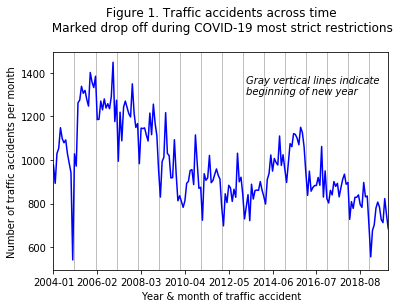

In [22]:
# grouping results
df_gptest = df_train_validate[['CRASH_DATE_YEAR_MONTH','REPORTNO']]
grouped_year_month = df_gptest.groupby(['CRASH_DATE_YEAR_MONTH'],as_index=True).count()
#grouped_year_month.info()
#grouped_year_month


#grouped_test1.plot()
#pyplot.show()
# Initialize the matplotlib figure
plt.figure(figsize=(10, 12))
ax = grouped_year_month.plot(color='blue')
ax.set_ylabel('Number of traffic accidents per month') 
ax.set_xlabel('Year & month of traffic accident') 
ax.set_title('Figure 1. Traffic accidents across time\n Marked drop off during COVID-19 most strict restrictions\n') 
ax.axvspan(12, 12, alpha=0.5, color='gray') # 2004
ax.axvspan(24, 24, alpha=0.5, color='gray') # 2005
ax.axvspan(36, 36, alpha=0.5, color='gray') # 2006
ax.axvspan(48, 48, alpha=0.5, color='gray') # 2007
ax.axvspan(60, 60, alpha=0.5, color='gray') # 2008
ax.axvspan(72, 72, alpha=0.5, color='gray') # 2009
ax.axvspan(84, 84, alpha=0.5, color='gray') # 2010
ax.axvspan(96, 96, alpha=0.5, color='gray') # 2011
ax.axvspan(108, 108, alpha=0.5, color='gray') # 2012
ax.axvspan(120, 120, alpha=0.5, color='gray') # 2013
ax.axvspan(132, 132, alpha=0.5, color='gray') # 2014
ax.axvspan(144, 144, alpha=0.5, color='gray') # 2015
ax.axvspan(156, 156, alpha=0.5, color='gray') # 2016
ax.axvspan(168, 168, alpha=0.5, color='gray') # 2017
ax.axvspan(180, 180, alpha=0.5, color='gray') # 2018
ax.axvspan(192, 192, alpha=0.5, color='gray') # 2019

ax.get_legend().remove() # Remove the legend

ax.text(110, 1300, 'Gray vertical lines indicate\nbeginning of new year', style='italic', color='black')


Text(0.5, 1.0, 'Figure 2. Total traffic accidents by month between 2004 & 2019\n Data suggests possible seasonality with traffic accidents in Feb. & Oct.')

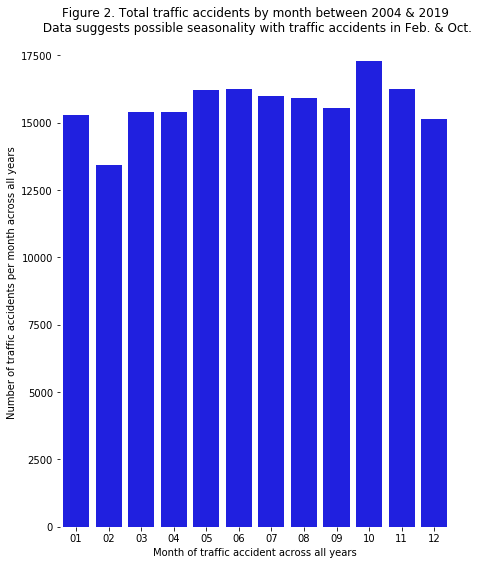

In [23]:
# grouping results
df_gptest = df_train_validate[['CRASH_DATE_MONTH','REPORTNO']]
grouped_crash_date_month = df_gptest.groupby(['CRASH_DATE_MONTH'],as_index=False).count()
#grouped_crash_date_month.info()
#grouped_crash_date_month

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 9))  # Width and height

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x="CRASH_DATE_MONTH", y="REPORTNO", data=grouped_crash_date_month,
            label="Total", color="blue")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Number of traffic accidents per month across all years",
       xlabel="Month of traffic accident across all years")
sns.despine(left=True, bottom=True)
ax.set_title('Figure 2. Total traffic accidents by month between 2004 & 2019\n Data suggests possible seasonality with traffic accidents in Feb. & Oct.')

Text(0.5, 1.0, 'Figure 3. Total traffic accidents by year\nIn general, there has been YoY decline in traffic accidents, with\n2014 & 2015 as exceptions')

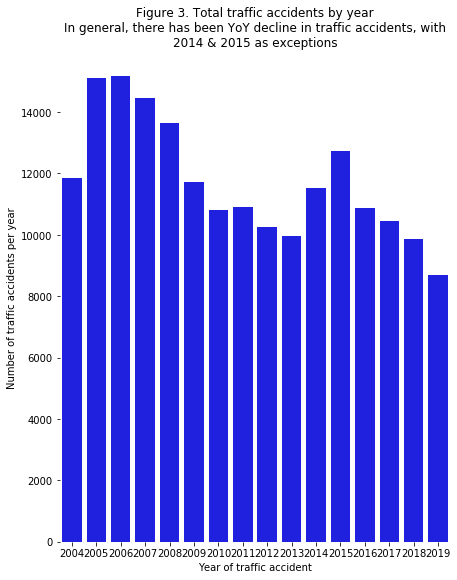

In [24]:
# grouping results
df_gptest = df_train_validate[['CRASH_DATE_YEAR','REPORTNO']]
grouped_crash_date_year = df_gptest.groupby(['CRASH_DATE_YEAR'],as_index=False).count()
#grouped_crash_date_month.info()
#grouped_crash_date_month

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 9))  # Width and height

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x="CRASH_DATE_YEAR", y="REPORTNO", data=grouped_crash_date_year,
            label="Total", color="blue")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Number of traffic accidents per year",
       xlabel="Year of traffic accident")
sns.despine(left=True, bottom=True)
ax.set_title('Figure 3. Total traffic accidents by year\nIn general, there has been YoY decline in traffic accidents, with\n2014 & 2015 as exceptions')

---

<h2>3. Methodology</h2>

Recall, the focus of this capstone case study is to predict the severity of an accident; for this case study, I have defined severity as an accident involving an injury. I __use supervised machine learning (SML) as the *analytical approach* to predict the severity of an accident__. I selected SML in part because of the variety of models available, including logistic regression, k-nearest neighbors (k-NN), support vector machine and decision tree. I used logistic regression and k-NN for the case study. 

**Modeling** will be done using the train / validation dataframe (df_train_validate) while **evaluation** will be conducted using the out-of-sample (OOS) test dataframe (df_oos_test). I cleaned and prepared both of these dataframes in the data collection and preparation section of the analysis, no additional preparation is needed for modeling or evaluation. 

Tables 1 and 2 from the data section and reprinted below present information on the label and feature sets, respectively, that were used in the analysis. 

__Table 1.__ Label set

| Original values of SEVERITYCODE  | Feature engineered to be<br>*__binary__* number |
| :---                             | :---:                                           |
| 'Property Damage Only Collision' | 0                                               |
| 'Injury Collision'               | 1                                               | 

__Table 2.__ Feature set

| Ref.   | Feature              | Description                               | Type | 
| :---:  | :---                 | :---                                      | :--- |
| 01     | COLLISIONTYPE_TO_NUM | Collision type.  | Numeric unit interval (10 values)  |
| 02     | PERSONCOUNT          | The total number of people involved in the collision.  | Continous  |
| 03     | PEDCOUNT             | The number of pedestrians involved in the collision.  | Continous  |
| 04     | PEDCYLCOUNT          | The number of bicycles involved in the collision.  | Continous  |
| 05     | VEHCOUNT             | The number of vehicles involved in the collision.  | Continous  |
| 06     | HITPARKEDCAR_TO_NUM  | Whether or not the collision involved hitting a parked car.  | Binary. 1 = yes, 0 = no  |
| 07     | UNDERINFL_TO_NUM     | Whether or not a driver involved was under the influence of drugs or alcohol.  | Binary. 1 = yes, 0 = no  |
| 08     | WEATHER_TO_NUM       | A description of the weather conditions during the time of the collision.  | Numeric unit interval (11 values)  |
| 09     | ROADCOND_TO_NUM      | The condition of the road during the collision.  | Numeric unit interval (9 values)  |
| 10     | LIGHTCOND_TO_NUM     | The light conditions during the collision.  | Numeric unit interval (9 values)  |


Before I build a model, I split the train / validation dataframe into train and test sets and standardize the train and test feature sets. Train and test were stratified based on the label (SEVERITYCODE) to ensure I had a consistent makeup of label outcomes in each set. 


<h3>3.1. Modeling</h3>

I ran two types of models for this analysis, standard logistic regression and SML classification models, only the SML models will be used for prediction. I’ve included standard logistic regression to provide additional information / perspective on the relationship between accident severity (the dependent variable) and our feature set (the independent variables). The additional information I’m looking for include sign on the estimated coefficient and the p-value. I'm using a significance level (denoted as α or alpha) of 0.05 to determine if the association between the dependent and independent variables are statistically significant. 

The train / validate dataframe will be *used to train and test the SML models*; this set contains records with incident dates between Jan. 1, 2004 and Dec. 31, 2019 and has 188,061 records. Summary results from modeling are presented in Table 3, for complete details, please see the modeling section. 

__Table 3.__ Evaluation of SML models on train / validation sets

| Evaluation metirc                    | Model 1: Logistic<br>regression | Model 2: k-nearest<br>neighbors (k-NN) |
| :---                                 | :---:                        | :---:                                  |
| Accuracy classification score (train set) | 0.749867 | 0.753171 |
| *__Evaluation of SML models on validation set__* |  |  | 
| Jaccard similarity coefficient score | 0.210730                     | 0.288048                               |
| F1 score                             | 0.348104                     | 0.447262                               |
| Log loss                             | 0.538100                     | Not applicable                         |
| *__Confusion matrix from validation set__* |  |  | 
| True positives                       | 22.14%                       | 33.94%                                 |
| False negatives                      | 77.86%                       | 66.06%                                 |
| False positive                       | 2.19%                        | 7.68%                                  |
| True negatives                       | 97.81%                       | 92.32%                                 |



<h3>3.2. Evaluation</h3>

The out-of-sample (OOS) test dataframe will be *used to evaluate model performance* by using data the model has not seen; this set was populated from records with records with incident date greater than or equal to Jan. 1, 2020, there are 1,255 records in this set.

Through evaluation, I want to understand and quantitfy prediction accuracy of SML logistic regression and k-NN models I built using the train and validate data set. I accomplish this goal by applying these models to the OOS test dataframe. Summary results from evaluation are presented in Table 4, for complete details, please see the evaluation section. 

__Table 4.__ Evaluation of SML models on out-of-sample (OOS) test set

| Evaluation metirc                    | Model 1: Logistic<br>regression | Model 2: k-nearest<br>neighbors (k-NN) |
| :---                                 | :---:                        | :---:                                  |
| Jaccard similarity coefficient score | 0.343808                     | 0.198276                               |
| F1 score                             | 0.511692                     | 0.330935                               |
| Log loss                             | 0.859434                     | Not applicable                         |
| *__Confusion matrix from OOS test set__* |  |  | 
| True positives                       | 93.47%                       | 34.67%                                 |
| False negatives                      |  6.53%                       | 65.33%                                 |
| False positive                       | 79.81%                       | 34.77%                                 |
| True negatives                       | 20.19%                       | 65.23%                                 |


In [25]:
# The crashes dataframe has been subset to the date range of interest and we've performed a few transformations; 
# it is time to create a new data frame for crashes and move on to initial pre-precessing of our other data sets

feature_df = df_train_validate[['COLLISIONTYPE_TO_NUM', 
                                'PERSONCOUNT', 
                                'PEDCOUNT',  
                                'PEDCYLCOUNT', 
                                'VEHCOUNT', 
                                'HITPARKEDCAR_TO_NUM',           
                                'UNDERINFL_TO_NUM',           
                                'WEATHER_TO_NUM',
                                'ROADCOND_TO_NUM',           
                                'LIGHTCOND_TO_NUM' 
                               ]].copy()

print("What's the shape of our feature_df dataframe?")
print('Number of features: {}'.format(feature_df.shape[1]))
print('Number of examples: {}'.format(feature_df.shape[0]))

# Convert pandas dataframe into NumPy array
X = np.asarray(feature_df)
X[0:5]


What's the shape of our feature_df dataframe?
Number of features: 10
Number of examples: 188061


array([[3, 2, 0, 0, 2, 0, 0, 1, 1, 1],
       [1, 2, 0, 0, 2, 0, 0, 6, 7, 6],
       [4, 2, 0, 0, 2, 0, 0, 6, 7, 6],
       [2, 2, 0, 0, 2, 0, 0, 6, 1, 6],
       [3, 1, 0, 0, 1, 0, 0, 4, 7, 6]])

In [26]:
label_df = df_train_validate[['SEVERITYCODE_TO_NUM']].copy()

print("What's the shape of our label_df dataframe?")
print('Number of features: {}'.format(label_df.shape[1]))
print('Number of examples: {}'.format(label_df.shape[0]))

# Convert pandas dataframe into NumPy array
y = np.asarray(label_df.SEVERITYCODE_TO_NUM)
y[0:5]

What's the shape of our label_df dataframe?
Number of features: 1
Number of examples: 188061


array([1, 0, 0, 1, 0])

In [27]:
# Get a distribution (count) of values in our label_df . . . this is used to check y_train and y_test 
# with dropna set to False we can also see NaN index values.
label_df.SEVERITYCODE_TO_NUM.value_counts(dropna=False)

0    131420
1     56641
Name: SEVERITYCODE_TO_NUM, dtype: int64

In [28]:
# What's the distribution (percentage) of outcomes in our label_df . . . this is used to check y_train and y_test 
label_df['SEVERITYCODE_TO_NUM'].value_counts(normalize=True)

0    0.698816
1    0.301184
Name: SEVERITYCODE_TO_NUM, dtype: float64

In [29]:
# split arrays or matrices into random train and test subsets
# random_state allows for reproducable results, without random_state the algo would select different random 
# splits every time 
# it is important to have an approximately balanced stratified, on the target, sample. We accomplish this by 
# using 'stratify=y'
# We can now quickly sample a training set while holding out 30% of the data for testing (evaluating) our classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20200918, stratify=y)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (131642, 10) (131642,)
Test set: (56419, 10) (56419,)


In [30]:
# Stratified check 01: training set 

# Convert Numpy array to a pandas datafram 
df_y_train = pd.DataFrame(y_train)

#df_y_train[0].value_counts() # Returns counts 
df_y_train[0].value_counts(normalize=True) # Returns percentages 

0    0.69882
1    0.30118
Name: 0, dtype: float64

In [31]:
# Stratified check 02: testing set 

# Convert Numpy array to a pandas datafram 
df_y_test = pd.DataFrame(y_test)

#df_y_test[0].value_counts() # Returns counts 
df_y_test[0].value_counts(normalize=True) # Returns percentages 

0    0.698807
1    0.301193
Name: 0, dtype: float64

The training, **y_train**, and testing, **y_test**, Numpy arrays <font color='red'>have 'SEVERITYCODE' distributions similar to the original csv file</font>. Stated differently, neither y_train or y_test have target outcomes that are biased towards 0 ('Property Damage Only Collision') or 1 ('Injury Collision'). 

With the train and test sets created, I turn my attention to **standardization** of these data sets. Standardization of data is a common requirement for many machine learning estimators.

In [32]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# ENHANCEMENT: use pipeline 

X_train_transformed = preprocessing.StandardScaler().fit(X_train).transform(X_train) # fit does nothing
X_test_transformed = preprocessing.StandardScaler().fit(X_test).transform(X_test) # fit does nothing


In [33]:
# Let's check on the standardization of our feature set (expect mean = 0 and std = 1), Numpy array X. 
# To accomplish this, we'll write our Numpy array into a new pandas dataframe
df_describe = pd.DataFrame(X_train_transformed)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.316420e+05,1.316420e+05,1.316420e+05,1.316420e+05,1.316420e+05,1.316420e+05,1.316420e+05,1.316420e+05,1.316420e+05,1.316420e+05
mean,6.416155e-16,1.263387e-16,-9.637823e-16,1.062789e-15,-3.477939e-15,1.390609e-15,-3.721054e-15,-3.504883e-16,-2.314248e-15,3.876057e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.034521e+00,-1.793869e+00,-1.897249e-01,-1.716992e-01,-3.536377e+00,-1.929271e-01,-2.246784e-01,-7.267790e-01,-6.349688e-01,-7.027539e-01
25%,-1.034521e+00,-3.352843e-01,-1.897249e-01,-1.716992e-01,5.159471e-02,-1.929271e-01,-2.246784e-01,-7.267790e-01,-6.349688e-01,-7.027539e-01
50%,-2.230182e-01,-3.352843e-01,-1.897249e-01,-1.716992e-01,5.159471e-02,-1.929271e-01,-2.246784e-01,-7.267790e-01,-6.349688e-01,-7.027539e-01
75%,5.884850e-01,3.940080e-01,-1.897249e-01,-1.716992e-01,5.159471e-02,-1.929271e-01,-2.246784e-01,7.572237e-01,1.639086e+00,1.492729e+00
max,2.617243e+00,5.727881e+01,2.959060e+01,1.165295e+01,1.619747e+01,5.183304e+00,4.450806e+00,4.219897e+00,2.397104e+00,2.810018e+00


In [34]:
# Let's check on the standardization of our feature set (expect mean = 0 and std = 1), Numpy array X. 
# To accomplish this, we'll write our Numpy array into a new pandas dataframe
df_describe = pd.DataFrame(X_test_transformed)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9
count,5.641900e+04,5.641900e+04,5.641900e+04,5.641900e+04,5.641900e+04,5.641900e+04,5.641900e+04,5.641900e+04,5.641900e+04,5.641900e+04
mean,3.742002e-16,-1.903942e-16,-3.129582e-15,-2.353415e-15,-7.804114e-16,-4.686712e-16,8.178831e-16,1.555156e-15,-2.500585e-15,-2.010120e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.033580e+00,-1.860327e+00,-1.898925e-01,-1.715843e-01,-3.535080e+00,-1.899118e-01,-2.272697e-01,-7.207699e-01,-6.294967e-01,-7.074770e-01
25%,-1.033580e+00,-3.471819e-01,-1.898925e-01,-1.715843e-01,5.520430e-02,-1.899118e-01,-2.272697e-01,-7.207699e-01,-6.294967e-01,-7.074770e-01
50%,-2.209496e-01,-3.471819e-01,-1.898925e-01,-1.715843e-01,5.520430e-02,-1.899118e-01,-2.272697e-01,-7.207699e-01,-6.294967e-01,-7.074770e-01
75%,5.916810e-01,4.093904e-01,-1.898925e-01,-1.715843e-01,5.520430e-02,-1.899118e-01,-2.272697e-01,7.692132e-01,1.654977e+00,1.478432e+00
max,2.623257e+00,3.899458e+01,2.001481e+01,1.161249e+01,1.800662e+01,5.265603e+00,4.400059e+00,4.245840e+00,2.416469e+00,2.789978e+00


<h3>3.1. Modeling</h3>


Check to see if `joblib` is installed. I use `joblib` to store train model results and apply those models to test data set. 

In [35]:
!pip install joblib

# Import Joblib
import joblib

# Create a dictionary to store 'train' scores from different models
trainScores={}

<h4>3.1.1. Base line model 0: standard logistic regression</h4>

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

feature_df = sm.add_constant(feature_df)


# Logit model
print('Regression with discrete dependent binary variable: modeling traffic accidents using non-standardized data')
print('----------------------------------------------------------------------------------------------------------')
print('')
logit_mod = sm.Logit(label_df, feature_df) # X aka endogenous response variable or independent variables, y aka exogenous design or dependent variable 
logit_res = logit_mod.fit()
print('')
print('Estimate of Logit model, re: estimated coefficients and standard errors')
print('')
print(logit_res.summary())
print('')

# Get marginal effects of the fitted model
#mfx = logit_mod.get_margeff()
#print(mfx.summary())

Regression with discrete dependent binary variable: modeling traffic accidents using non-standardized data
----------------------------------------------------------------------------------------------------------

Optimization terminated successfully.
         Current function value: 0.538190
         Iterations 7

Estimate of Logit model, re: estimated coefficients and standard errors

                            Logit Regression Results                           
Dep. Variable:     SEVERITYCODE_TO_NUM   No. Observations:               188061
Model:                           Logit   Df Residuals:                   188050
Method:                            MLE   Df Model:                           10
Date:                 Sat, 19 Sep 2020   Pseudo R-squ.:                  0.1204
Time:                         14:34:14   Log-Likelihood:            -1.0121e+05
converged:                        True   LL-Null:                   -1.1507e+05
Covariance Type:             nonrobust   LLR p-va

*__Interpretation of results of standard logistic regression__*

Somewhat surprisingly, the association between accident severity and weather is not statistically significant (p-value 0.164). Weather is only feature variable that is not statistically significant. 


In [37]:
# Import machine learning libraries
import sklearn
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix # For model evaluation 
from sklearn.model_selection import cross_val_score 
import itertools

print ("sklearn is installed; we're using version: ", sklearn.__version__)


sklearn is installed; we're using version:  0.21.2


<h4>3.1.2. Supervised machine learning model 1: logistic regression</h4>
<p>
First SML model in this analysis.  
</p>

SML logistic model using scikit-learn
-------------------------------------
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

----- OUTPUT BREAK -----

Accuracy evaluation for SML logistic regression model
Train set, re: Accuracy classification score: 0.749867
Jaccard similarity coefficient score: 0.210730
F1 score: 0.348104
Log loss: 0.538098

----- OUTPUT BREAK -----

Receiver operating characteristic (ROC)


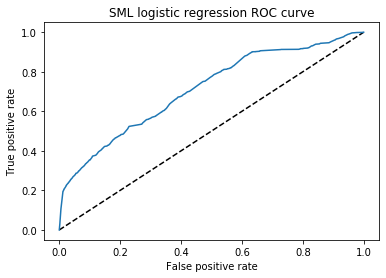


Area under the ROC curve (AUC): 0.7102486226398427
AUC using cross-valiation: [0.70497908 0.70783161 0.70588028 0.70609122 0.70209817]

----- OUTPUT BREAK -----

Classification report

              precision    recall  f1-score   support

           0   0.744555  0.978086  0.845491     39426
           1   0.813270  0.221444  0.348104     16993

    accuracy                       0.750191     56419
   macro avg   0.778913  0.599765  0.596797     56419
weighted avg   0.765252  0.750191  0.695681     56419


----- OUTPUT BREAK -----

Confusion matrix, without normalization
[[38562   864]
 [13230  3763]]

----- OUTPUT BREAK -----

Quick check of predicted output from logistic regression model
[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]



In [38]:
# Create instance (i.e. object) of LogisticRegression
print('SML logistic model using scikit-learn')
print('-------------------------------------')
LogReg_model = LogisticRegression(C=0.1, solver='liblinear', random_state=0)
print(LogReg_model)
print('')
print("----- OUTPUT BREAK -----")
print('')
print("Accuracy evaluation for SML logistic regression model")
# Step 1. Training . . . Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
LogReg_model.fit(X_train_transformed, y_train)
print("Train set, re: Accuracy classification score: %.6f" % metrics.accuracy_score(y_train, LogReg_model.predict(X_train_transformed)))
# 'Accuracy from sk-learn: {0}' returns the same value as metrics.accuracy_score
#print('Accuracy from sk-learn: {0}'.format(LogReg_model.score(X_train_transformed, y_train))) # print the training scores
# Step 2. Predicting 
yhat = LogReg_model.predict(X_test_transformed)
# Step 3. Accuracy evaluation
print("Jaccard similarity coefficient score: %.6f" % jaccard_score(y_test, yhat))
print("F1 score: %.6f" % f1_score(y_test, yhat))
yhat_prob = LogReg_model.predict_proba(X_test_transformed)
print("Log loss: %.6f" % log_loss(y_test, yhat_prob))
print('')
print("----- OUTPUT BREAK -----")
print('')
print("Receiver operating characteristic (ROC)")
yhat_prob = LogReg_model.predict_proba(X_test_transformed)[:,1] # ENHANCEMENT, re: can this be removed since it is above
fpr, tpr, thresholds = roc_curve(y_test, yhat_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SML logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SML logistic regression ROC curve')
plt.show();
print('')
print("Area under the ROC curve (AUC):", roc_auc_score(y_test, yhat_prob))
cv_scores = cross_val_score(LogReg_model, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print("AUC using cross-valiation:", cv_scores)
print('')
print("----- OUTPUT BREAK -----")
print('')
# Use scikit-learn classification_report to build a text report showing the main classification metrics
print("Classification report\n")
print(metrics.classification_report(y_test, yhat, digits=6))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Confusion matrix
print("Confusion matrix, without normalization")
print(confusion_matrix(y_test, yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Quick check of predicted values
print('Quick check of predicted output from logistic regression model')
print(yhat[0:15])
print('')


Confusion matrix, without normalization
[[ 3763 13230]
 [  864 38562]]

Normalized confusion matrix
[[0.2214 0.7786]
 [0.0219 0.9781]]


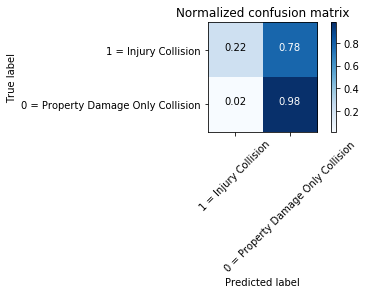

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion matrix, without normalization')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
print('')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=4)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1 = Injury Collision','0 = Property Damage Only Collision'],normalize= True,  title='Normalized confusion matrix')


*__Interpretation of results of SML logistic regression__*

The first row of the confusion matrix is for accidents in the test set with a with a SEVERITYCODE_TO_NUM (the label element) of 1. Out of the 16,993 elements (3,763 + 13,230) the SML logistic classifier correctly predicted 3,761, or ~22% as 1. This isn't a good result and should be considered as an error for this model. 

For accidents with SEVERITYCODE_TO_NUM of 0, the SML logistic classifier correctly predicted ~98% of observations. This classifier has done a good job in predicting accidents with property damage only (SEVERITYCODE_TO_NUM of 0). 

To improve classifier accuracy for injury collision, I will try *tuning the hyper-parameters of the estimator* by considering different values of C and choice of solver using grid search with cross-validation. 

<h4><i>Parameter estimation using grid search with cross-validation (GridSearchCV): Finding the best C and penalty for SML logistic regression</i></h4>

In [40]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X = X_train_transformed
y = y_train

print("Parameter estimation using grid search with cross-validation, for SML logistic regression model")
print("-----------------------------------------------------------------------------------------------")
print('')
# Create logistic regression
logistic = linear_model.LogisticRegression()
#####
#####
# Create hyper-parameter search space
# 1. Regularization penalty space
penalty = ['l1', 'l2']
# 2. Regularization hyperparameter space
C = np.logspace(0, 0.1, 1, 10, 100)
# 3. Hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
#####
#####
# Create grid search using 10-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)
#####
#####
# Fit grid search . . . fit the model using the training data
best_model = clf.fit(X, y)
#####
#####
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Parameter estimation using grid search with cross-validation, for SML logistic regression model
-----------------------------------------------------------------------------------------------

Best Penalty: l2
Best C: 1.0


Above, I used grid search with cross-validation (GridSearchCV) to find the best parameter estimates (for C and penalty) for SML logistic regression. Now I will rerun my standard logistic regression procedure with C and penalty set to values from GridSearchCV output. 

SML logistic model using scikit-learn: Using output from tuning the hyper-parameters of an estimator
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

----- OUTPUT BREAK -----

Accuracy evaluation for SML logistic regression model
Train set, re: Accuracy classification score: 0.749867
Jaccard similarity coefficient score: 0.210730
F1 score: 0.348104
Log loss: 0.538100

----- OUTPUT BREAK -----

Receiver operating characteristic (ROC)


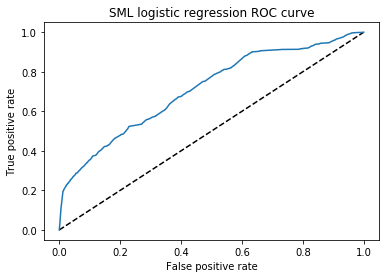


Area under the ROC curve (AUC): 0.7102577917616115
AUC using cross-valiation: [0.705  0.7079 0.7059 0.7061 0.7026]

----- OUTPUT BREAK -----

Classification report

              precision    recall  f1-score   support

           0   0.744555  0.978086  0.845491     39426
           1   0.813270  0.221444  0.348104     16993

    accuracy                       0.750191     56419
   macro avg   0.778913  0.599765  0.596797     56419
weighted avg   0.765252  0.750191  0.695681     56419


----- OUTPUT BREAK -----

Confusion matrix, without normalization
[[38562   864]
 [13230  3763]]

----- OUTPUT BREAK -----

Quick check of predicted output from logistic regression model
[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]


In [41]:
# Outputs from tuning the hyper-parameters of an estimator
best_penalty = 'l2'
best_c = 1.0

print('SML logistic model using scikit-learn: Using output from tuning the hyper-parameters of an estimator')
print('----------------------------------------------------------------------------------------------------')
# Create instance (i.e. object) of LogisticRegression
LogReg_model = LogisticRegression(C=best_c, solver='liblinear', penalty=best_penalty, random_state=0)
print(LogReg_model)
print('')
print("----- OUTPUT BREAK -----")
print('')
print("Accuracy evaluation for SML logistic regression model")
# Step 1. Training . . . Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
LogReg_model.fit(X_train_transformed, y_train)
print("Train set, re: Accuracy classification score: %.6f" % metrics.accuracy_score(y_train, LogReg_model.predict(X_train_transformed)))
# 'Accuracy from sk-learn: {0}' returns the same value as metrics.accuracy_score
#print('Accuracy from sk-learn: {0}'.format(LogReg_model.score(X_train_transformed, y_train))) # print the training scores
# Step 2. Predicting 
yhat = LogReg_model.predict(X_test_transformed)
# Step 3. Accuracy evaluation
print("Jaccard similarity coefficient score: %.6f" % jaccard_score(y_test, yhat))
print("F1 score: %.6f" % f1_score(y_test, yhat))
yhat_prob = LogReg_model.predict_proba(X_test_transformed)
print("Log loss: %.6f" % log_loss(y_test, yhat_prob))
print('')
print("----- OUTPUT BREAK -----")
print('')
print("Receiver operating characteristic (ROC)")
yhat_prob = LogReg_model.predict_proba(X_test_transformed)[:,1] # ENHANCEMENT, re: can this be removed since it is above
fpr, tpr, thresholds = roc_curve(y_test, yhat_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SML logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SML logistic regression ROC curve')
plt.show();
print('')
print("Area under the ROC curve (AUC):", roc_auc_score(y_test, yhat_prob))
cv_scores = cross_val_score(LogReg_model, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print("AUC using cross-valiation:", cv_scores)
print('')
print("----- OUTPUT BREAK -----")
print('')
# Use scikit-learn classification_report to build a text report showing the main classification metrics
print("Classification report\n")
print(metrics.classification_report(y_test, yhat, digits=6))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Confusion matrix
print("Confusion matrix, without normalization")
print(confusion_matrix(y_test, yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Quick check of predicted values
print('Quick check of predicted output from logistic regression model')
print(yhat[0:15])


Confusion matrix, without normalization
[[ 3763 13230]
 [  864 38562]]

Normalized confusion matrix
[[0.2214 0.7786]
 [0.0219 0.9781]]


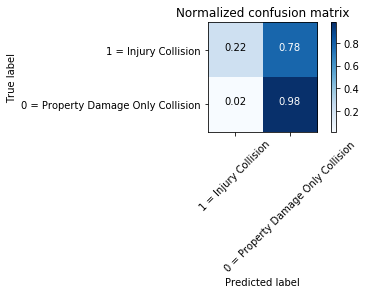

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion matrix, without normalization')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
print('')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=4)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1 = Injury Collision','0 = Property Damage Only Collision'],normalize= True,  title='Normalized confusion matrix')


*__Interpretation of results of SML logistic regression using output from GridSearchCV__*

Overall results for SML logistic regression with GridSearchCV inputs do not differ from the original SML logistic regression. 

The first row of the confusion matrix is for accidents in the test set with a with a SEVERITYCODE_TO_NUM (the label element) of 1. Out of the 16,993 elements (3,763 + 13,230) the SML logistic classifier correctly predicted 3,761, or ~22% as 1. This isn't a good result and should be considered as an error for this model. 

For accidents with SEVERITYCODE_TO_NUM of 0, the SML logistic classifier correctly predicted ~98% of observations. This classifier has done a good job in predicting accidents with property damage only (SEVERITYCODE_TO_NUM of 0). 


In [43]:
# Output best SML logistic regression evaluation metrics into trainScores dictionary
trainScores['SML logistic regression: jaccard_score']=metrics.jaccard_score(y_test, yhat)
trainScores['SML logistic regression: f1_score']=metrics.f1_score(y_test, yhat)
trainScores['SML logistic regression: log_loss']=log_loss(y_test, yhat_prob)
trainScores

{'SML logistic regression: jaccard_score': 0.2107296858374867,
 'SML logistic regression: f1_score': 0.34810360777058275,
 'SML logistic regression: log_loss': 0.5380997303989017}

<font color='green'>Save our logistic regression model using Joblib, this will persist the model for future use without having to retrain</font>

In [44]:
# Save to file in the current working directory
joblib_file_LogReg = "joblib_LogReg.pkl"
joblib.dump(LogReg_model, joblib_file_LogReg)

['joblib_LogReg.pkl']

<h4>3.1.3. Supervised machine learning model 2: k-nearest neighbors (k-NN)</h4>

Second SML model in this analysis.  

In [45]:
# k-nearest neighbors algorithm (k-NN) modeling
print('SML k-nearest neighbors (k-NN) model using scikit-learn')
print('-------------------------------------------------------')
k = 1
# Train the model and make predictions 
kNN_model = KNeighborsClassifier(n_neighbors = k, algorithm='auto').fit(X_train_transformed, y_train)
print(kNN_model)
print('')
print("----- OUTPUT BREAK -----")
print('')
print("Accuracy evaluation for k-nearest neighbors algorithm (k-NN) model, where k = 1")
# Step 1. Training . . . Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
kNN_model.fit(X_train_transformed, y_train)
print("Train set, re: Accuracy classification score: %.6f" % metrics.accuracy_score(y_train, kNN_model.predict(X_train_transformed)))
# 'Accuracy from sk-learn: {0}' returns the same value as metrics.accuracy_score
#print('Accuracy from sk-learn: {0}'.format(kNN_model.score(X_train_transformed, y_train))) # print the training scores
# Step 2. Predicting 
yhat = kNN_model.predict(X_test_transformed)
# Step 3. Accuracy evaluation
print("Jaccard similarity coefficient score: %.6f" % jaccard_score(y_test, yhat))
print("F1 score: %.6f" % f1_score(y_test, yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Use scikit-learn classification_report to build a text report showing the main classification metrics
print("Classification report\n")
print(metrics.classification_report(y_test, yhat, digits=6))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Confusion matrix
print("Confusion matrix, without normalization")
print(confusion_matrix(y_test, yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Quick check of predicted values
print('Quick check of predicted output from logistic regression model')
print(yhat[0:15])


SML k-nearest neighbors (k-NN) model using scikit-learn
-------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

----- OUTPUT BREAK -----

Accuracy evaluation for k-nearest neighbors algorithm (k-NN) model, where k = 1
Train set, re: Accuracy classification score: 0.696465
Jaccard similarity coefficient score: 0.316516
F1 score: 0.480839

----- OUTPUT BREAK -----

Classification report

              precision    recall  f1-score   support

           0   0.776177  0.778953  0.777563     39426
           1   0.482851  0.478844  0.480839     16993

    accuracy                       0.688562     56419
   macro avg   0.629514  0.628899  0.629201     56419
weighted avg   0.687829  0.688562  0.688192     56419


----- OUTPUT BREAK -----

Confusion matrix, without normalization
[[30711  8715]
 [ 8856  8137]

Confusion matrix, without normalization
[[ 8137  8856]
 [ 8715 30711]]

Normalized confusion matrix
[[0.4788 0.5212]
 [0.221  0.779 ]]


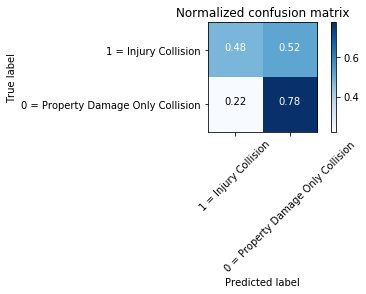

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion matrix, without normalization')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
print('')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=4)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1 = Injury Collision','0 = Property Damage Only Collision'],normalize= True,  title='Normalized confusion matrix')


*__Interpretation of results of SML k-nearest neighbors (k-NN) model__*

The first row of the confusion matrix is for accidents in the test set with a with a SEVERITYCODE_TO_NUM (the label element) of 1. Out of the 16,993 elements (8,137 + 8,856) the SML k-NN classifier correctly predicted ~48% (8,137 / 16,993) 1, these are *true positives*. While this result is certainly better than classification using SML logistic  regression, this shouldn't be considered as a good result.  

For accidents with SEVERITYCODE_TO_NUM of 0, the SML k-NN classifier correctly predicted ~78% (30,711 / 39,426) of observations. This classifier has done a good job in predicting accidents with property damage only (SEVERITYCODE_TO_NUM of 0). 

To improve classifier accuracy for injury collision, possible next steps include *tuning the hyper-parameters of an estimator* by considering different values of k using grid search with cross-validation.


<h4><i>Parameter estimation using grid search with cross-validation (GridSearchCV): Finding the best k for SML k-NN</i></h4>

In [47]:
# Finding the best k for k-NN using GridSearchCV 
# Tuning the hyper-parameters of an estimator
X = X_train_transformed
y = y_train

param_grid = {'n_neighbors': np.arange(1, 10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy')
knn_cv.fit(X, y)
print('Using GridSearchCV for tuning the hyper-parameters of an estimator: Finding the best k for SML k-NN model')
print('---------------------------------------------------------------------------------------------------------')
print(knn_cv.best_estimator_)
print("Best k =:", knn_cv.best_params_)
print("Best score:", knn_cv.best_score_)


Using GridSearchCV for tuning the hyper-parameters of an estimator: Finding the best k for SML k-NN model
---------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
Best k =: {'n_neighbors': 8}
Best score: 0.742673310949393


<h4><i>Alternate method to find the best k</i></h4>

In [48]:
# Find the best k 
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # Train the model and make predictions
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_transformed, y_train)
    yhat=neigh.predict(X_test_transformed)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.6886, 0.7365, 0.7237, 0.7337, 0.7315, 0.7451, 0.7226, 0.7474,
       0.7282])

Plot model accuracy for different number of neighbors 

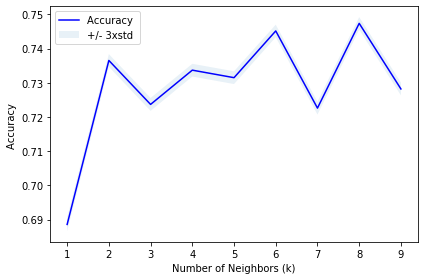

In [49]:
plt.plot(range(1,Ks),mean_acc,'blue')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

In [50]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7473546145801946 with k= 8


The routine above just identified the best k-NN model, according to **accuracy classification score**. Take the identified k and re-run the k-NN train, predict and evaluation sequence

The two methods I used to find the best *k* for my SML k-NN model are in agreement, *k* = 8. I used two methods to find the best *k* for my SML k-NN model. Now I will rerun my standard k-NN procedure with *k* set to 8 and review standard output. 

In [51]:
# k-nearest neighbors algorithm (k-NN) modeling
print('Using output from GridSearchCV as an input into SML k-nearest neighbors (k-NN) model using scikit-learn')
print('-------------------------------------------------------------------------------------------------------')
k = 8
# Train the model and make predictions 
kNN_model = KNeighborsClassifier(n_neighbors = k, algorithm='auto').fit(X_train_transformed, y_train)
print(kNN_model)
print('')
print("----- OUTPUT BREAK -----")
print('')
print("Accuracy evaluation for k-nearest neighbors algorithm (k-NN) model, where k = 8")
# Step 1. Training . . . Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
kNN_model.fit(X_train_transformed, y_train)
print("Train set, re: Accuracy classification score: %.6f" % metrics.accuracy_score(y_train, kNN_model.predict(X_train_transformed)))
# 'Accuracy from sk-learn: {0}' returns the same value as metrics.accuracy_score
#print('Accuracy from sk-learn: {0}'.format(kNN_model.score(X_train_transformed, y_train))) # print the training scores
# Step 2. Predicting 
yhat = kNN_model.predict(X_test_transformed)
# Step 3. Accuracy evaluation
print("Jaccard similarity coefficient score: %.6f" % jaccard_score(y_test, yhat))
print("F1 score: %.6f" % f1_score(y_test, yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Use scikit-learn classification_report to build a text report showing the main classification metrics
print("Classification report\n")
print(metrics.classification_report(y_test, yhat, digits=6))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Confusion matrix
print("Confusion matrix, without normalization")
print(confusion_matrix(y_test, yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Quick check of predicted values
print('Quick check of predicted output from logistic regression model')
print(yhat[0:15])


Using output from GridSearchCV as an input into SML k-nearest neighbors (k-NN) model using scikit-learn
-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

----- OUTPUT BREAK -----

Accuracy evaluation for k-nearest neighbors algorithm (k-NN) model, where k = 8
Train set, re: Accuracy classification score: 0.753171
Jaccard similarity coefficient score: 0.288048
F1 score: 0.447262

----- OUTPUT BREAK -----

Classification report

              precision    recall  f1-score   support

           0   0.764279  0.923198  0.836255     39426
           1   0.655713  0.339375  0.447262     16993

    accuracy                       0.747355     56419
   macro avg   0.709996  0.631286  0.641759     56419
weighted avg   0.731579  0.747355  0.719093     56419



Confusion matrix, without normalization
[[ 5767 11226]
 [ 3028 36398]]

Normalized confusion matrix
[[0.3394 0.6606]
 [0.0768 0.9232]]


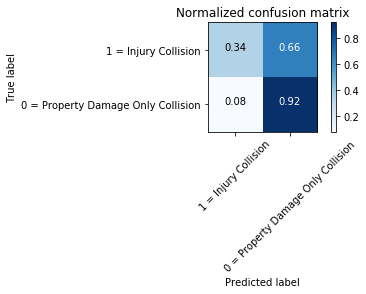

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion matrix, without normalization')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
print('')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=4)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1 = Injury Collision','0 = Property Damage Only Collision'],normalize= True,  title='Normalized confusion matrix')


*__Interpretation of results of SML k-NN model using output from GridSearchCV__*

The first row of the confusion matrix is for accidents in the test set with a with a SEVERITYCODE_TO_NUM (the label element) of 1. Out of the 16,993 elements (5,767 + 11,226) the SML k-NN classifier correctly predicted ~34% (5,767 / 16,993) 1, these are *true positives*. While this result is certainly better than classification using SML logistic  regression, this shouldn't be considered as a good result.  

For accidents with SEVERITYCODE_TO_NUM of 0, the SML k-NN classifier correctly predicted ~92% (36,398 / 39,426) of observations. This classifier has done a good job in predicting accidents with property damage only (SEVERITYCODE_TO_NUM of 0). 

Interestingly, the k=8 k-NN model does a worse job predicting injury collision as compared to the k=1 k-NN model. The loss in predictive power for injury collision was a gain for predicting property damage only collision, which increased by ~14 percentage points. 


In [53]:
# Output best SML logistic regression evaluation metrics into trainScores dictionary
trainScores['SML: k-nearest neighbors (k-NN): jaccard_score']=metrics.jaccard_score(y_test, yhat)
trainScores['SML: k-nearest neighbors (k-NN): f1_score']=metrics.f1_score(y_test, yhat)
trainScores

{'SML logistic regression: jaccard_score': 0.2107296858374867,
 'SML logistic regression: f1_score': 0.34810360777058275,
 'SML logistic regression: log_loss': 0.5380997303989017,
 'SML: k-nearest neighbors (k-NN): jaccard_score': 0.28804755007242394,
 'SML: k-nearest neighbors (k-NN): f1_score': 0.4472622925391655}

<font color='green'>Save our logistic regression model using Joblib, this will persist the model for future use without having to retrain</font>

In [54]:
# Save to file in the current working directory
joblib_file_kNN = "joblib_kNN.pkl"
joblib.dump(kNN_model, joblib_file_kNN)

['joblib_kNN.pkl']

<h3>3.2. Evaluation</h3>

In [55]:
# Creating the test feature set 
test_Feature = df_oos_test[['COLLISIONTYPE_TO_NUM', 
                            'PERSONCOUNT', 
                            'PEDCOUNT',  
                            'PEDCYLCOUNT', 
                            'VEHCOUNT', 
                            'HITPARKEDCAR_TO_NUM',           
                            'UNDERINFL_TO_NUM',           
                            'WEATHER_TO_NUM',
                            'ROADCOND_TO_NUM',           
                            'LIGHTCOND_TO_NUM' 
                           ]].copy()

print("What's the shape of our test_Feature dataframe?")
print('Number of features: {}'.format(test_Feature.shape[1]))
print('Number of examples: {}'.format(test_Feature.shape[0]))

# Convert pandas dataframe into NumPy array
test_X = np.asarray(test_Feature)
test_X[0:5]

# Standardization 
test_X_transformed = preprocessing.StandardScaler().fit(test_X).transform(test_X) # fit does nothing


What's the shape of our test_Feature dataframe?
Number of features: 10
Number of examples: 1255


In [56]:
# Let's check on the standardization of our feature set (expect mean = 0 and std = 1), Numpy array X. 
# To accomplish this, we'll write our Numpy array into a new pandas dataframe
df_describe = pd.DataFrame(test_X_transformed)
df_describe.describe()


,0,1,2,3,4,5,6,7,8,9
count,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1255.0,1.255000e+03,1.255000e+03,1.255000e+03
mean,-3.680102e-17,-3.199742e-16,-1.295865e-15,-4.099421e-16,1.399279e-16,-1.521581e-17,0.0,1.854559e-15,6.287135e-15,-5.686465e-16
std,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,0.0,1.000399e+00,1.000399e+00,1.000399e+00
min,-1.166917e+00,-1.244964e+00,-2.139127e-01,-1.643317e-01,-1.631286e+00,-3.684381e-01,0.0,-1.005865e+00,-8.934687e-01,-8.033946e-01
25%,-7.628107e-01,-4.022296e-01,-2.139127e-01,-1.643317e-01,8.765939e-02,-3.684381e-01,0.0,-1.005865e+00,-8.934687e-01,-8.033946e-01
50%,4.540157e-02,-4.022296e-01,-2.139127e-01,-1.643317e-01,8.765939e-02,-3.684381e-01,0.0,3.404135e-01,-8.934687e-01,-8.033946e-01
75%,4.495077e-01,4.405052e-01,-2.139127e-01,-1.643317e-01,8.765939e-02,-3.684381e-01,0.0,1.237932e+00,1.123264e+00,1.236792e+00
max,2.470038e+00,1.898067e+01,1.277611e+01,6.085253e+00,6.963443e+00,2.714160e+00,0.0,3.481729e+00,1.795508e+00,2.460904e+00


In [57]:
# Creating the test label set
test_Label = df_oos_test[['SEVERITYCODE_TO_NUM']].copy()

print("What's the shape of our test_Label dataframe?")
print('Number of features: {}'.format(test_Label.shape[1]))
print('Number of examples: {}'.format(test_Label.shape[0]))

# Convert pandas dataframe into NumPy array
test_y = np.asarray(test_Label.SEVERITYCODE_TO_NUM)
test_y[0:5]

What's the shape of our test_Label dataframe?
Number of features: 1
Number of examples: 1255


array([0, 0, 0, 1, 0])

In [58]:
# What's the distribution (percentage) of outcomes in our test_Label
test_Label['SEVERITYCODE_TO_NUM'].value_counts(normalize=True)


0    0.682869
1    0.317131
Name: SEVERITYCODE_TO_NUM, dtype: float64

In [59]:
# Get a distribution (count) of values in our test_Label
# with dropna set to False we can also see NaN index values.
test_Label.SEVERITYCODE_TO_NUM.value_counts(dropna=False)

0    857
1    398
Name: SEVERITYCODE_TO_NUM, dtype: int64

In [60]:
# Dictionary for keeping test scores 
testScores={}

<h4>3.2.1. Evaluation of SML model 1: Logistic regression</h4>

In [61]:
# Step 1: Reload the saved model using Joblib
joblib_model_LogReg = joblib.load(joblib_file_LogReg)
# Check model details 
print(joblib_model_LogReg)
# Step 2. Predicting 
LogReg_yhat = joblib_model_LogReg.predict(test_X)
LogReg_yhat_prob = joblib_model_LogReg.predict_proba(test_X)
# Step 3. Accuracy evaluation
print("Evaluation of SML logistic regression using test set df_oos_test")
print('----------------------------------------------------------------')
print("Jaccard similarity coefficient score: %.6f" % jaccard_score(test_y, LogReg_yhat))
print("F1 score: %.6f" % f1_score(test_y, LogReg_yhat)) # average='weighted'
print("Log loss: %.6f" % log_loss(test_y, LogReg_yhat_prob))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Use scikit-learn classification_report to build a text report showing the main classification metrics
print("Classification report\n")
print(metrics.classification_report(test_y, LogReg_yhat, digits=6))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Confusion matrix
print("Confusion matrix, without normalization")
print(confusion_matrix(test_y, LogReg_yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Quick check of predicted values
print('Quick check of predicted output from logistic regression model')
print(LogReg_yhat[0:15])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Evaluation of SML logistic regression using test set df_oos_test
----------------------------------------------------------------
Jaccard similarity coefficient score: 0.343808
F1 score: 0.511692
Log loss: 0.859434

----- OUTPUT BREAK -----

Classification report

              precision    recall  f1-score   support

           0   0.869347  0.201867  0.327652       857
           1   0.352273  0.934673  0.511692       398

    accuracy                       0.434263      1255
   macro avg   0.610810  0.568270  0.419672      1255
weighted avg   0.705366  0.434263  0.386017      1255


----- OUTPUT BREAK -----

Confusion matrix, without normalization
[[173 684]
 [ 

Confusion matrix, without normalization
[[372  26]
 [684 173]]

Normalized confusion matrix
[[0.9347 0.0653]
 [0.7981 0.2019]]


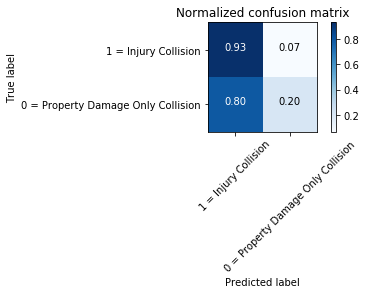

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion matrix, without normalization')
print(confusion_matrix(test_y, LogReg_yhat, labels=[1,0]))
print('')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, LogReg_yhat, labels=[1,0])
np.set_printoptions(precision=4)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1 = Injury Collision','0 = Property Damage Only Collision'],normalize= True,  title='Normalized confusion matrix')


*__Interpretation of results for evaluation SML logistic regression__*

The first item that stood out when reviewing OOS test results was the *true positives* figure in the confusion matrix. At ~93% for OOS test, compared to ~22% for train / validation, I'd say the SML logistic classifier is working well. On the other hand, the *false positives* percentage increased to ~80% in OOS test from ~2% in train / validation. 

If our main goal is to predict accident severity, with severity being defined as an accident with an injury, the model seems to perform well, but with a high price in false positives. 


In [63]:
# Output best SML logistic regression evaluation metrics into testScores dictionary
testScores['SML logistic regression: jaccard_score']=metrics.jaccard_score(test_y, LogReg_yhat)
testScores['SML logistic regression: f1_score']=metrics.f1_score(test_y, LogReg_yhat)
testScores['SML logistic regression: log_loss']=log_loss(test_y, LogReg_yhat_prob)
testScores


{'SML logistic regression: jaccard_score': 0.3438077634011091,
 'SML logistic regression: f1_score': 0.5116918844566712,
 'SML logistic regression: log_loss': 0.8594342501747311}

<h4>3.2.2. Evaluation of SML model 2: k-nearest neighbors (k-NN)</h4>

In [65]:
# Step 1: Reload the saved model using Joblib
joblib_model_kNN = joblib.load(joblib_file_kNN)
# Check model details 
print(joblib_model_kNN)
print('')
# Step 2. Predicting 
kNN_yhat = joblib_model_kNN.predict(test_X)
# Step 3. Accuracy evaluation
print("Evaluation of SML k-nearest neighbors (k-NN) using test set df_oos_test")
print('-----------------------------------------------------------------------')
print("Jaccard similarity coefficient score: %.6f" % jaccard_score(test_y, kNN_yhat))
print("F1 score: %.6f" % f1_score(test_y, kNN_yhat)) # average='weighted'
print('')
print("----- OUTPUT BREAK -----")
print('')
# Use scikit-learn classification_report to build a text report showing the main classification metrics
print("Classification report\n")
print(metrics.classification_report(test_y, kNN_yhat, digits=6))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Confusion matrix
print("Confusion matrix, without normalization")
print(confusion_matrix(test_y, kNN_yhat))
print('')
print("----- OUTPUT BREAK -----")
print('')
# Quick check of predicted values
print('Quick check of predicted output from logistic regression model')
print(kNN_yhat[0:15])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

Evaluation of SML k-nearest neighbors (k-NN) using test set df_oos_test
-----------------------------------------------------------------------
Jaccard similarity coefficient score: 0.198276
F1 score: 0.330935

----- OUTPUT BREAK -----

Classification report

              precision    recall  f1-score   support

           0   0.682540  0.652275  0.667064       857
           1   0.316514  0.346734  0.330935       398

    accuracy                       0.555378      1255
   macro avg   0.499527  0.499505  0.499000      1255
weighted avg   0.566461  0.555378  0.560467      1255


----- OUTPUT BREAK -----

Confusion matrix, without normalization
[[559 298]
 [260 138]]

----- OUTPUT BREAK -----

Quick check of predicted output from logistic regression model
[1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]


Confusion matrix, without normalization
[[138 260]
 [298 559]]

Normalized confusion matrix
[[0.3467 0.6533]
 [0.3477 0.6523]]


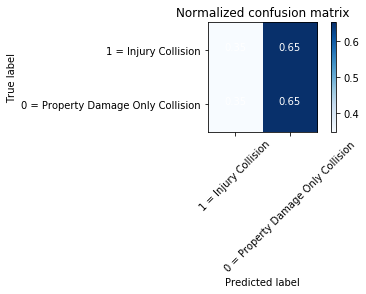

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion matrix, without normalization')
print(confusion_matrix(test_y, kNN_yhat, labels=[1,0]))
print('')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, kNN_yhat, labels=[1,0])
np.set_printoptions(precision=4)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1 = Injury Collision','0 = Property Damage Only Collision'],normalize= True,  title='Normalized confusion matrix')


In [67]:
# Output best SML logistic regression evaluation metrics into testScores dictionary
testScores['SML k-nearest neighbors (k-NN): jaccard_score']=metrics.jaccard_score(test_y, kNN_yhat)
testScores['SML k-nearest neighbors (k-NN): f1_score']=metrics.f1_score(test_y, kNN_yhat)
testScores

{'SML logistic regression: jaccard_score': 0.3438077634011091,
 'SML logistic regression: f1_score': 0.5116918844566712,
 'SML logistic regression: log_loss': 0.8594342501747311,
 'SML k-nearest neighbors (k-NN): jaccard_score': 0.19827586206896552,
 'SML k-nearest neighbors (k-NN): f1_score': 0.33093525179856115}

---

<h2>4. Results</h2>
  
I considered two SML classification models, logistic regression and k-NN, to address the question of predicting severity of an accident. The evaluation of these models on out-of-sample test data suggests that the logistic reqression is the best classifier, based on Jaccard score, F1 score and true positives percentage. Summary evaluation metrics are reported in Table 4. 

__Table 4.__ Evaluation of SML models on out-of-sample (OOS) test set

| Evaluation metirc                    | Model 1: Logistic<br>regression | Model 2: k-nearest<br>neighbors (k-NN) |
| :---                                 | :---:                        | :---:                                  |
| Jaccard similarity coefficient score | 0.343808                     | 0.198276                               |
| F1 score                             | 0.511692                     | 0.330935                               |
| Log loss                             | 0.859434                     | Not applicable                         |
| *__Confusion matrix from OOS test set__* |  |  | 
| True positives                       | 93.47%                       | 34.67%                                 |
| False negatives                      |  6.53%                       | 65.33%                                 |
| False positive                       | 79.81%                       | 34.77%                                 |
| True negatives                       | 20.19%                       | 65.23%                                 |


<h2>5. Discussion</h2>
  
Future analysis enhancements can be grouped into three bucket. First, I could use feature engineering to transform the label from a binary outcome into a multinomial, using an <i>__ordinal__</i> scale. This would allow me to get more severity detail, such as property damage and amount of dollar damage. Second, I could consider additional SML classifier models such as: 

    * Support Vector Machine (SVM); 
    * Decision Tree; and 
    * Neighborhood Components Analysis (NCA)

Lastly, I could collect additional feature data elements and determine correlation between variables or run principal component analysis (PCA) as a way to reduce the number of features to the most impactful set. 

<h2>6. Conclusions</h2>
  
In this analysis, I started statistical modeling with a standard logistic regression to provide additional information / perspective on the relationship between accident severity (the dependent variable) and our feature set (the independent variables). I then moved to SML without and with hyper-parameter tuning to predict accident severity. 

From the standard logistic regression, I learned, somewhat surprisingly, the association between accident severity and weather is not statistically significant (p-value 0.164). Weather is only feature variable that is not statistically significant.

In regard to SML, the logistic regression was the best performing classifier, at 93.47% true positives. However, this performance appears to come at a price, with false positives ~80%. 


---

<h4><i>Version history</i></h4>

| Date       | Version | Changed by  | Change description |
| :---:      | :---:   | :---        | :---               |
| 2020-09-19 | 0.0     | Sean Moffat | Initial commit to GitHub. |
